In [1]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LogNorm
import itertools
from matplotlib import gridspec
from scipy.signal import find_peaks

pd.option_context('display.max_columns', -1)

pd.options.mode.chained_assignment = None #Disabpd.option_context('display.max_columns', 300)le copy warnings
# plt.style.use('fivethirtyeight') #Set style
# mpl.rcParams.update({'figure.figsize' : (15,10)})  #Set general plotting options
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({"savefig.dpi" : 300}) #Figure resolution


#Define plotting style:
sns.set() #Set style
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
cm = plt.colormaps.get_cmap('RdYlBu')

# Experimento 3: Lei de Stefan-Boltzmann



## Dados

In [9]:
data_exp3 = pd.read_csv('Dados_Termico/Dados_Exp3.txt', header = 0, sep = '\t', encoding='latin-1')
print(data_exp3)

    Tensao  I(mA)  Radiacao(mV)
0        1  0.204        -0.121
1        2  0.282         0.095
2        3  0.345         0.442
3        4  0.400         0.875
4        5  0.450         1.385
5        6  0.500         1.975
6        7  0.541         2.575
7        8  0.580         3.200
8        9  0.621         4.005
9       10  0.656         4.780
10      11  0.689         5.510
11      12  0.723         6.295


In [19]:
R = np.array(data_exp3['Tensao']/data_exp3['I(mA)'])

R_norm = R/1.5

print('Resistência', R)
print()
print('Resistência/R_300', R_norm)


Resistência [ 4.90196078  7.09219858  8.69565217 10.         11.11111111 12.
 12.93900185 13.79310345 14.49275362 15.24390244 15.96516691 16.59751037]

Resistência/R_300 [ 3.26797386  4.72813239  5.79710145  6.66666667  7.40740741  8.
  8.62600123  9.1954023   9.66183575 10.16260163 10.64344461 11.06500692]


## Valores de Resistência convertidos em temperatura através da tabela:



In [87]:
#T = np.array([800., 1100., 1300., 1400., 1600., 1700., 1800., 1900., 1950., 2000., 2100., 2200.]) valor sem o uso do gráfico de conversão
T = np.array([800., 1050., 1300., 1400., 1550., 1650., 1750., 1850., 1950., 2050., 2100., 2200.]) #K

In [88]:
print(T**4)

[4.09600000e+11 1.21550625e+12 2.85610000e+12 3.84160000e+12
 5.77200625e+12 7.41200625e+12 9.37890625e+12 1.17135062e+13
 1.44590062e+13 1.76610062e+13 1.94481000e+13 2.34256000e+13]


In [89]:
print(data_exp3['Radiacao(mV)'])

0    -0.121
1     0.095
2     0.442
3     0.875
4     1.385
5     1.975
6     2.575
7     3.200
8     4.005
9     4.780
10    5.510
11    6.295
Name: Radiacao(mV), dtype: float64


## Gráfico dos dados brutos

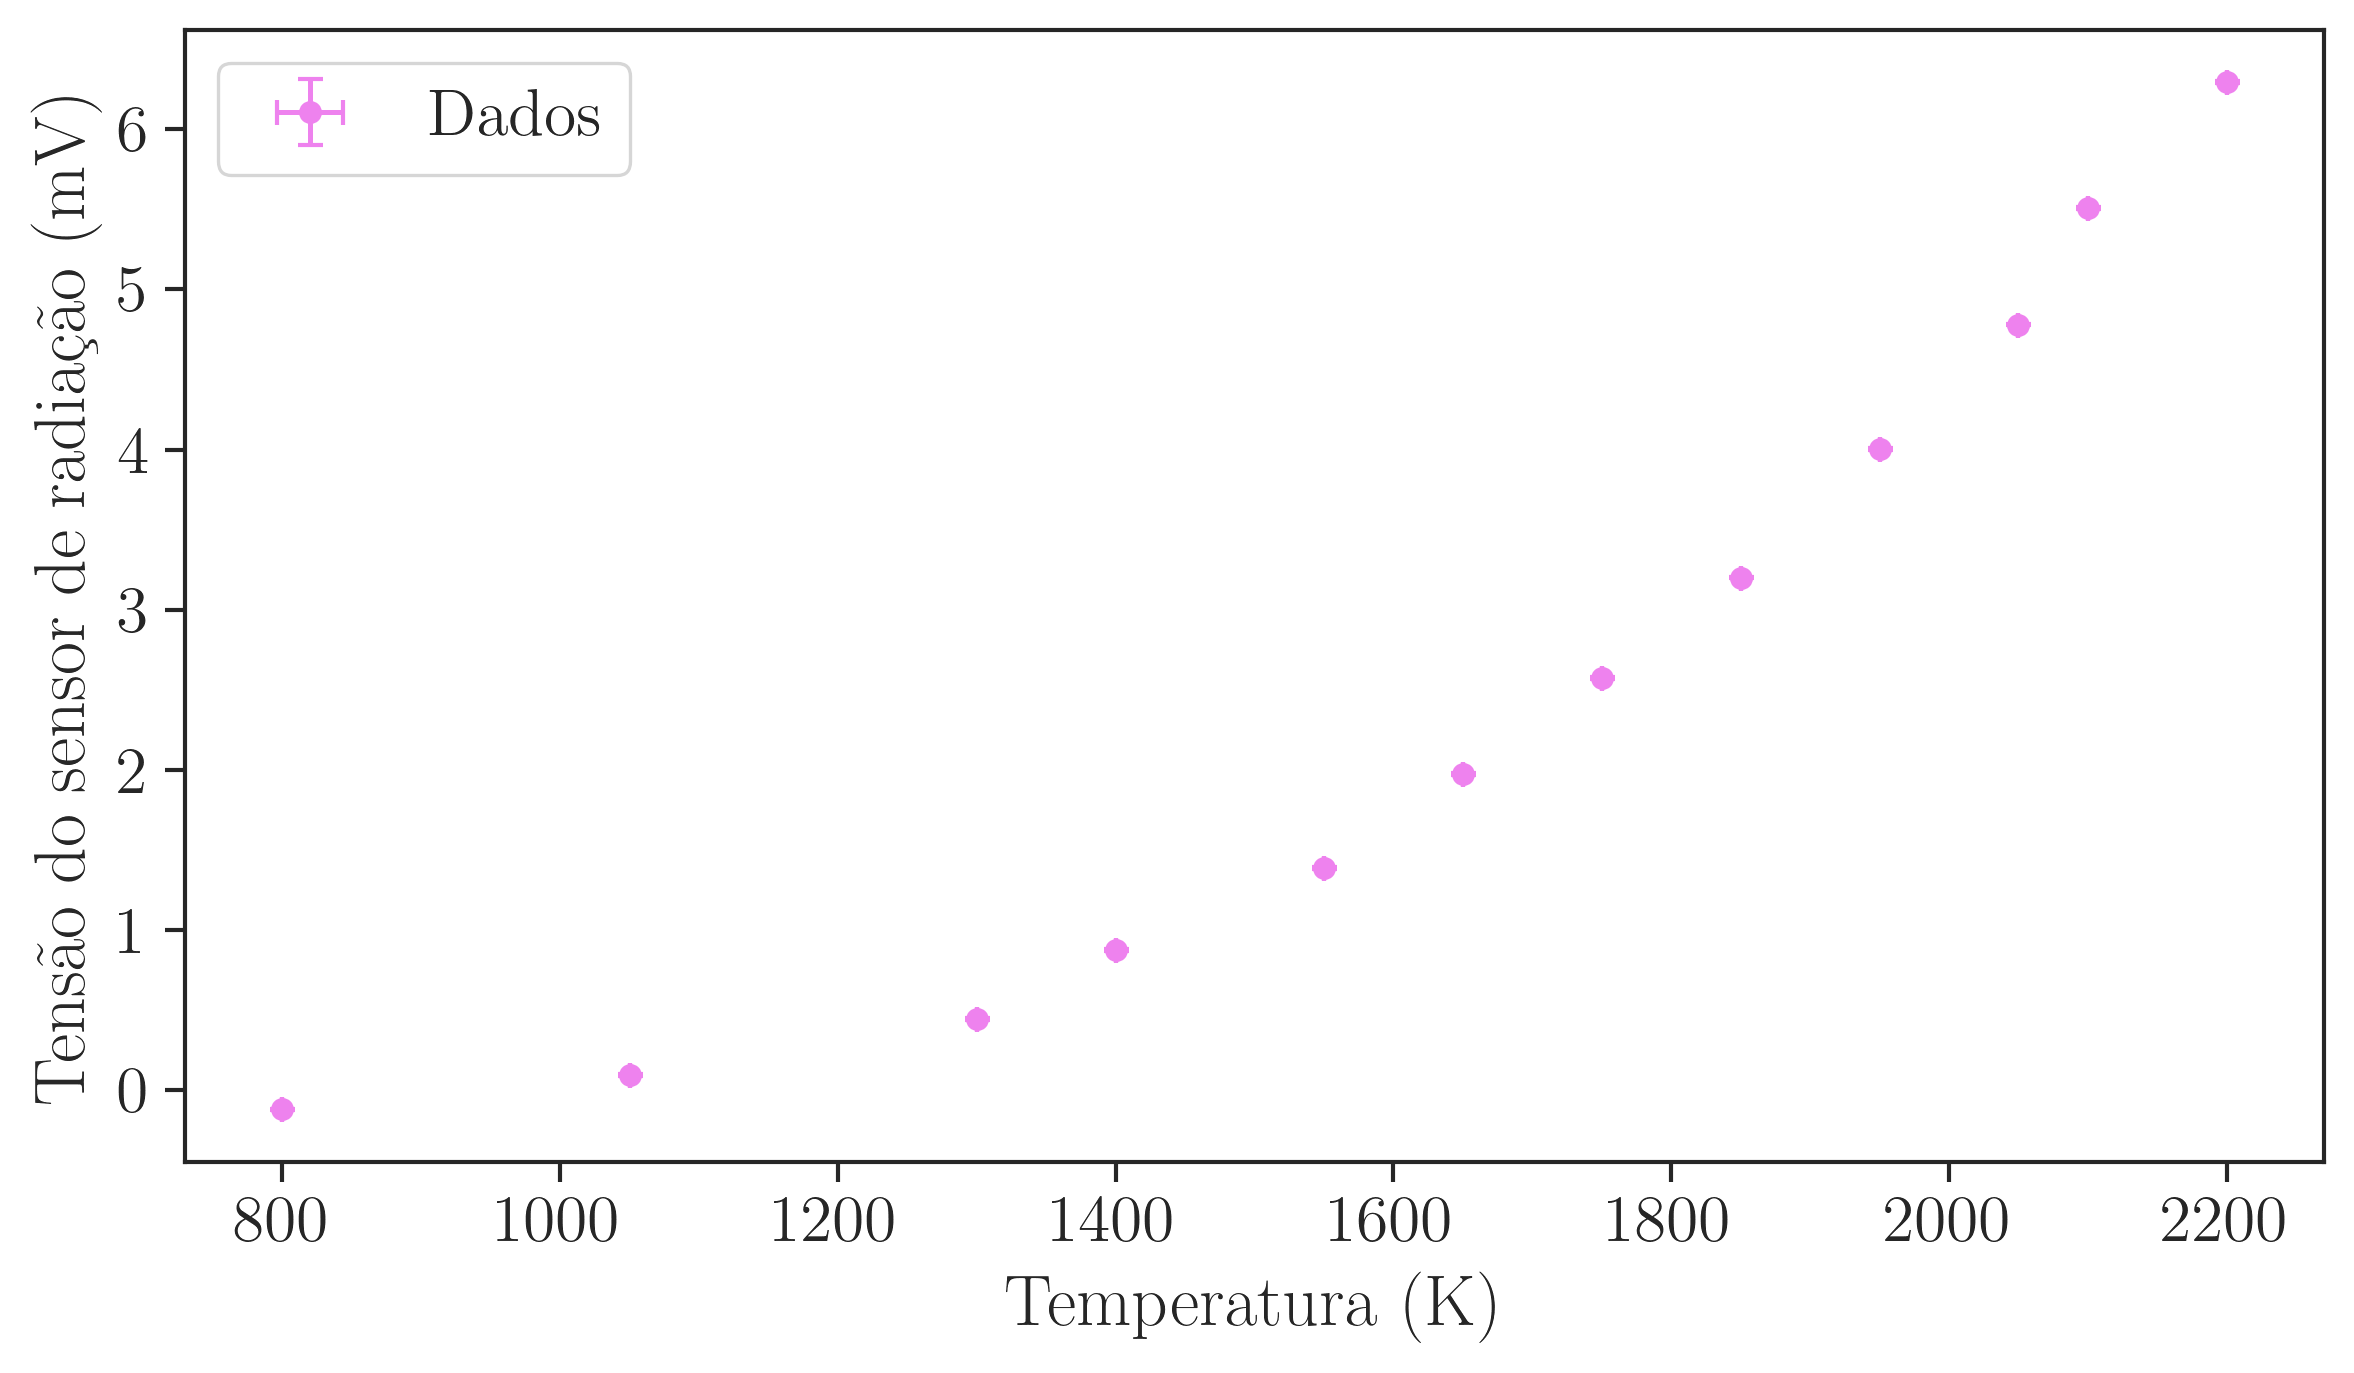

In [130]:
plt.figure(figsize = [9.2,4.9], dpi = 300) 
plt.errorbar(T,data_exp3['Radiacao(mV)'], 0.005,0,  'o', ms = 4.5, capsize=3, 
                color = 'violet', label = 'Dados')

plt.xlabel(r'Temperatura (K)')
plt.ylabel(r'Tensão do sensor de radiação (mV)')
plt.legend()
plt.show()

## Método 1: Plotando o gráfico por $T^4$ e realizando o ajuste


### Gráfico de Radiação por $T^4$

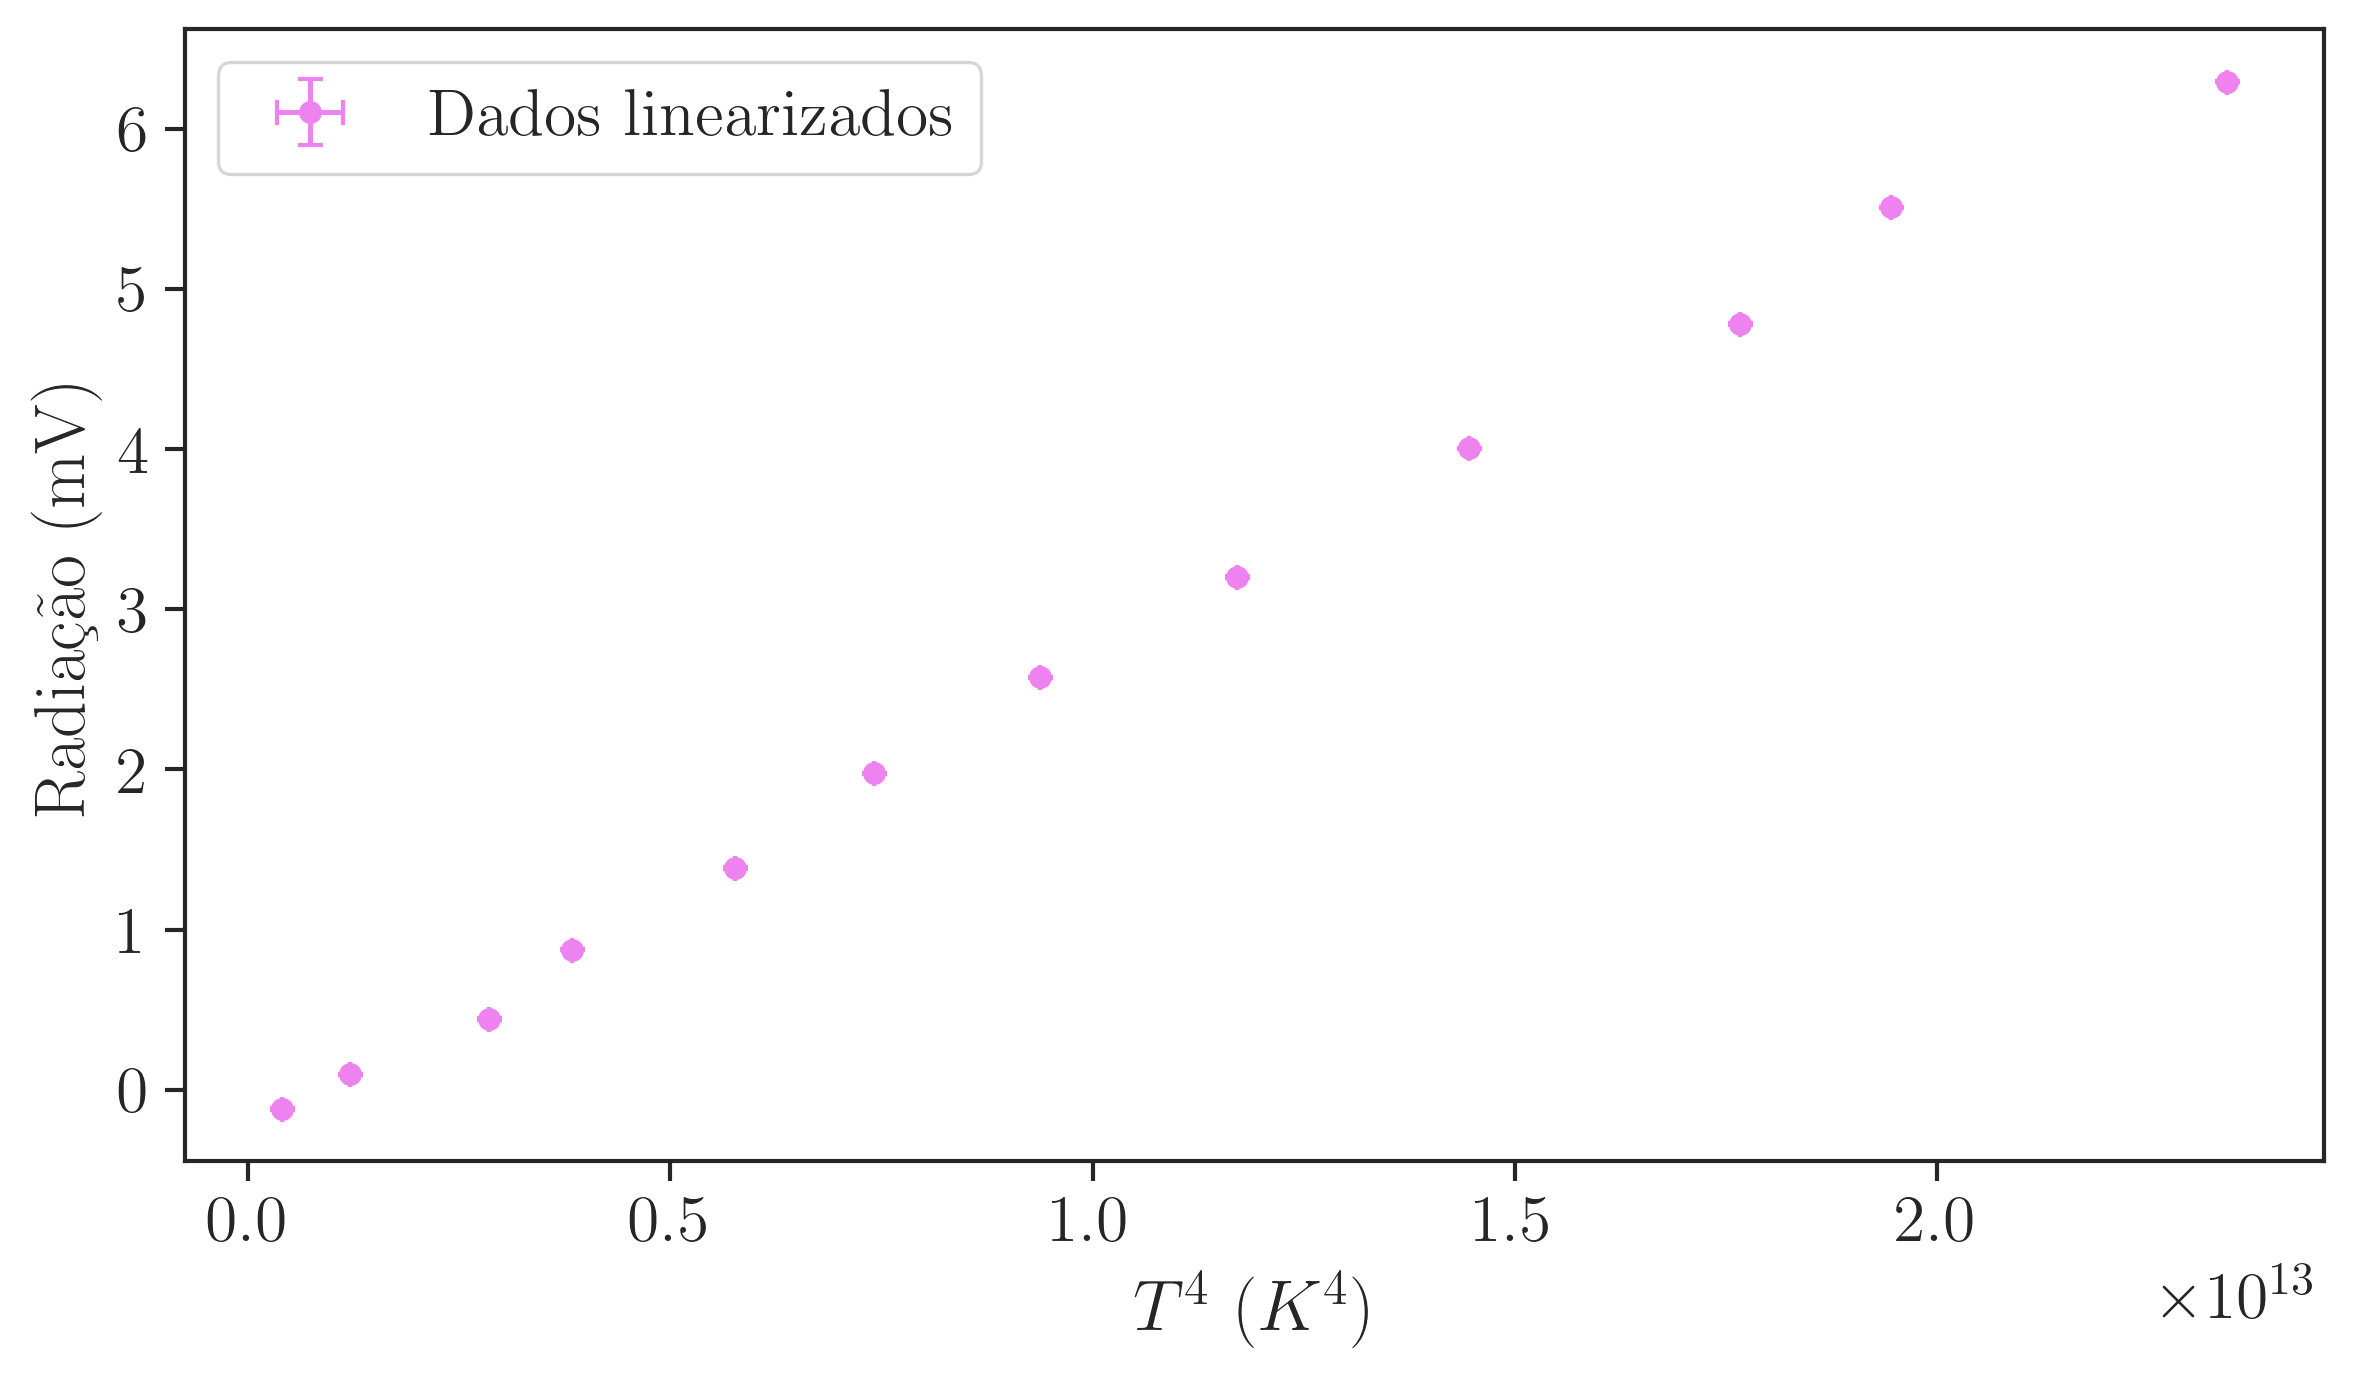

In [94]:
plt.figure(figsize = [9.2,4.9], dpi = 300) 
plt.errorbar(T**4,data_exp3['Radiacao(mV)'], 0.005,0,  'o', ms = 4.5, capsize=3, 
         color = 'violet', label = 'Dados linearizados')
plt.xlabel(r'$T^4$ ($K^4$)')
plt.ylabel(r'Tensão do sensor de radiação (mV)')
plt.legend()
plt.show()

### Ajuste linear



In [132]:
fitpars, cov_pars = np.polyfit(T**4,data_exp3['Radiacao(mV)'],1,w=np.power(np.full(len(data_exp3['Radiacao(mV)']),0.005),-1),cov='True')
#print(fitpars, cov_pars)

coef_angular = fitpars[0]
coef_linear = fitpars[1]
sigma_angular = np.sqrt(cov_pars[0][0])
sigma_linear = np.sqrt(cov_pars[1][1])

sigma_angular = float('{:g}'.format(float('{:.1g}'.format(sigma_angular))))
sigma_linear = float('{:g}'.format(float('{:.1g}'.format(sigma_linear))))

                     
print('Coeficiente angular: %.15f +- %.15f (mV/K^4)' % (coef_angular ,sigma_angular))
print('Coeficiente linear: %.2f +- %.2f (mV)' %(coef_linear,sigma_linear))

Coeficiente angular: 0.000000000000287 +- 0.000000000000004 (mV/K^4)
Coeficiente linear: -0.23 +- 0.05 (mV)


In [123]:
#Calulando chi^2_red
yhat = np.polyval(fitpars, T**4)
chi_squared = np.sum(((yhat - data_exp3['Radiacao(mV)'])/0.005) ** 2)
chi2_red = chi_squared/(len(data_exp3['Radiacao(mV)'])-2)

#Imprimindo o resultado
print("chi^2_red = %.3f" % chi2_red)

chi^2_red = 490.807


### Gráfico do ajuste linear

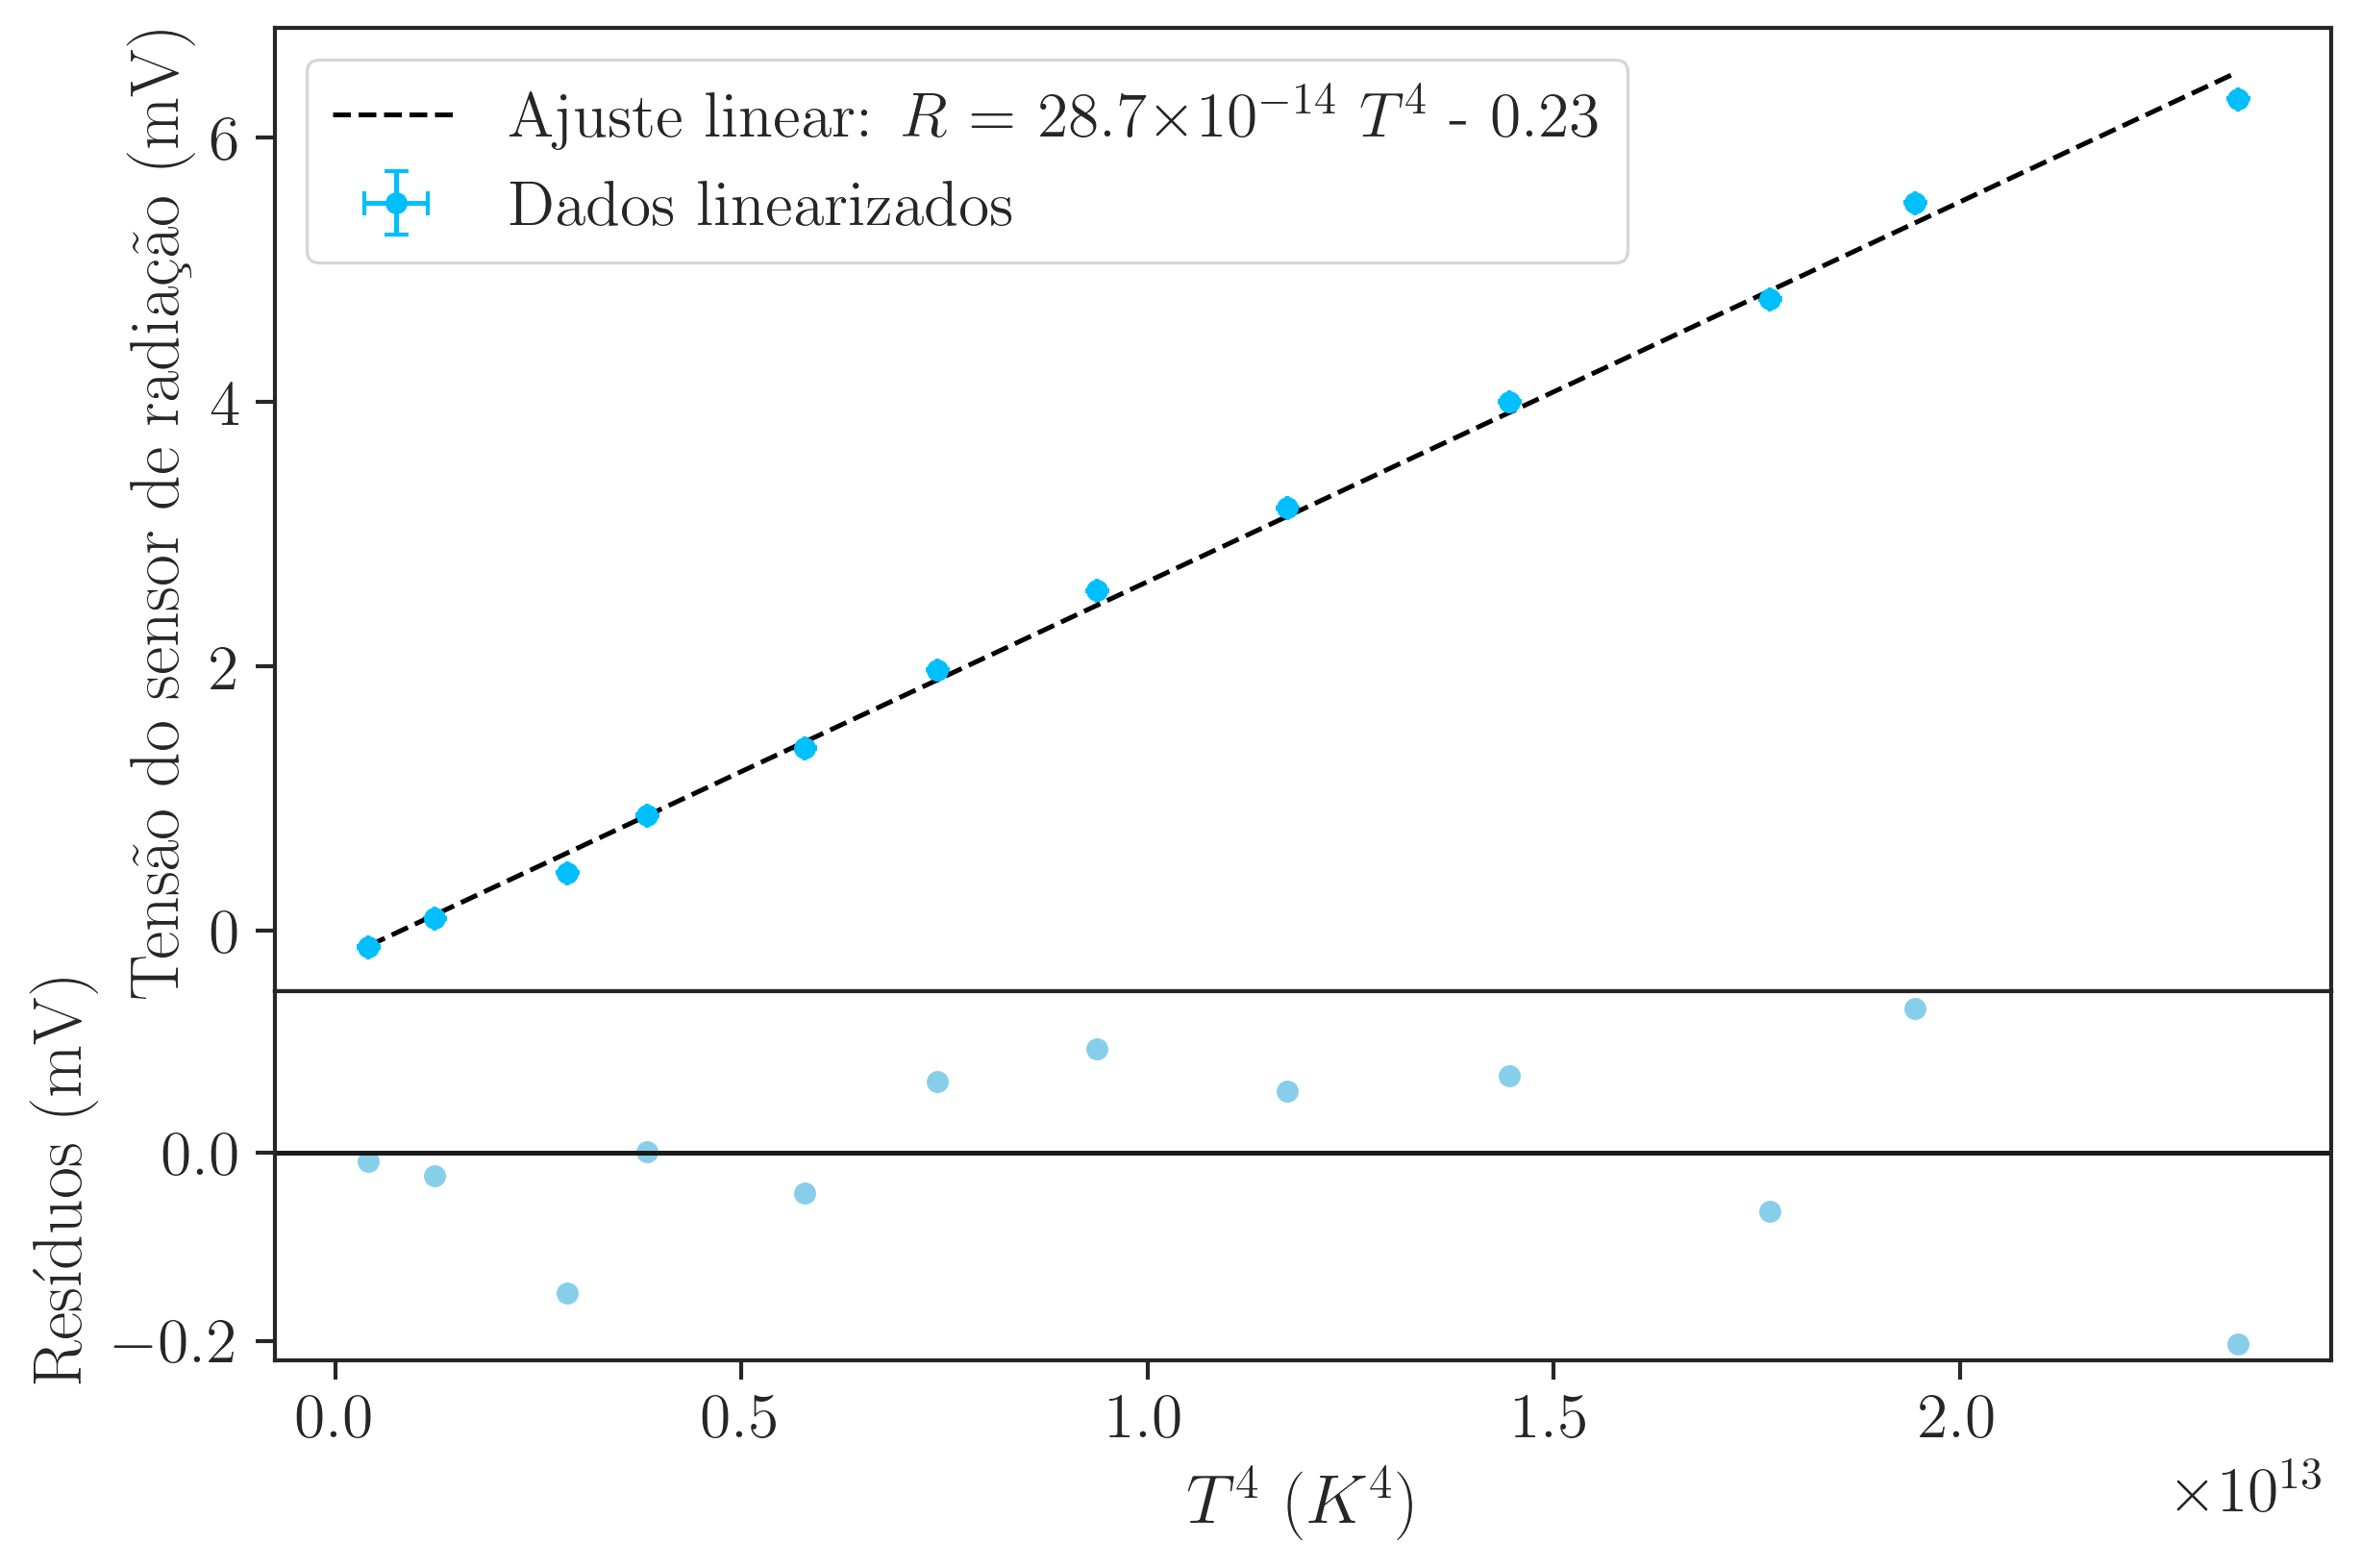

In [134]:
fig = plt.figure(figsize = [9.2,6], dpi = 300) 
gs = fig.add_gridspec(2,1, hspace=0, height_ratios=[6, 2.3])
axs = gs.subplots(sharex=True)


#Gráfico principal
axs[0] = plt.subplot(gs[0])
plt.errorbar(T**4,data_exp3['Radiacao(mV)'], 0.005,0,  'o', ms = 4.5, capsize=3, 
         color = 'deepskyblue', label = 'Dados linearizados')
axs[0].plot(T**4,(T**4 * coef_angular + coef_linear), color ='black', ls = '--',
         label = r'Ajuste linear: $R$ = %.1f$\times 10^{-14}$ $T^4$ - %.2f' % (coef_angular*1e14,abs(coef_linear)))
axs[0].set_ylabel(r'Tensão do sensor de radiação (mV)')
axs[0].legend()
axs[0].set_title('')

#Gráfico de resíduos
axs[1] = plt.subplot(gs[1])
resid = (data_exp3['Radiacao(mV)'] - yhat)
axs[1].plot(T**4, resid, 'o',ms = 4.5,  color = 'skyblue', label = 'Residuos')
axs[1].axhline(y=0, color='k', linestyle='-')
axs[1].set_ylabel(r"Resíduos (mV)")

#axs[0].plot(a,(a*0.2768), color ='black', ls = '--',
         #label = r'Ajuste linear: $F_r$ = %.3f $a$ - %.2f' % (coef_angular,abs(coef_linear)))

plt.xlabel(r'$T^4$ ($K^4$)')



#plt.savefig('Graphs/PenduloFisico/Ajuste_amortecido.pdf')
plt.show()

## Método 2: Encontrando a potência via gráfico log-log

Aqui vamos assumir que a radiação é proporcional a n-ésima potência da temperatura, isto é:

$$R = \sigma T^n$$

onde $\sigma$ é uma constante. Note que se aplicarmos o logaritmo natural de ambos os lados, nós temos:

$$\ln{R} = \ln{\sigma T^n} = \ln{\sigma} + n\ln{T}$$

Portanto, analisando o logaritmo natural dos dados, podemos encontrar qual é essa potência fazendo depois um ajuste linear.


A incerteza da radiação pode ser propagada da seguinte forma:

$$\sigma_{\ln{R}} = \bigg\vert \frac{d \ln{R}}{R}\bigg\vert\sigma_R = \frac{\sigma_R}{\vert R\vert} $$

In [139]:
ln_R = np.log(data_exp3['Radiacao(mV)'])
ln_T = np.log(T)
sigma_ln_R = abs(0.005/data_exp3['Radiacao(mV)'])

### Gráfico  log-log dos dados

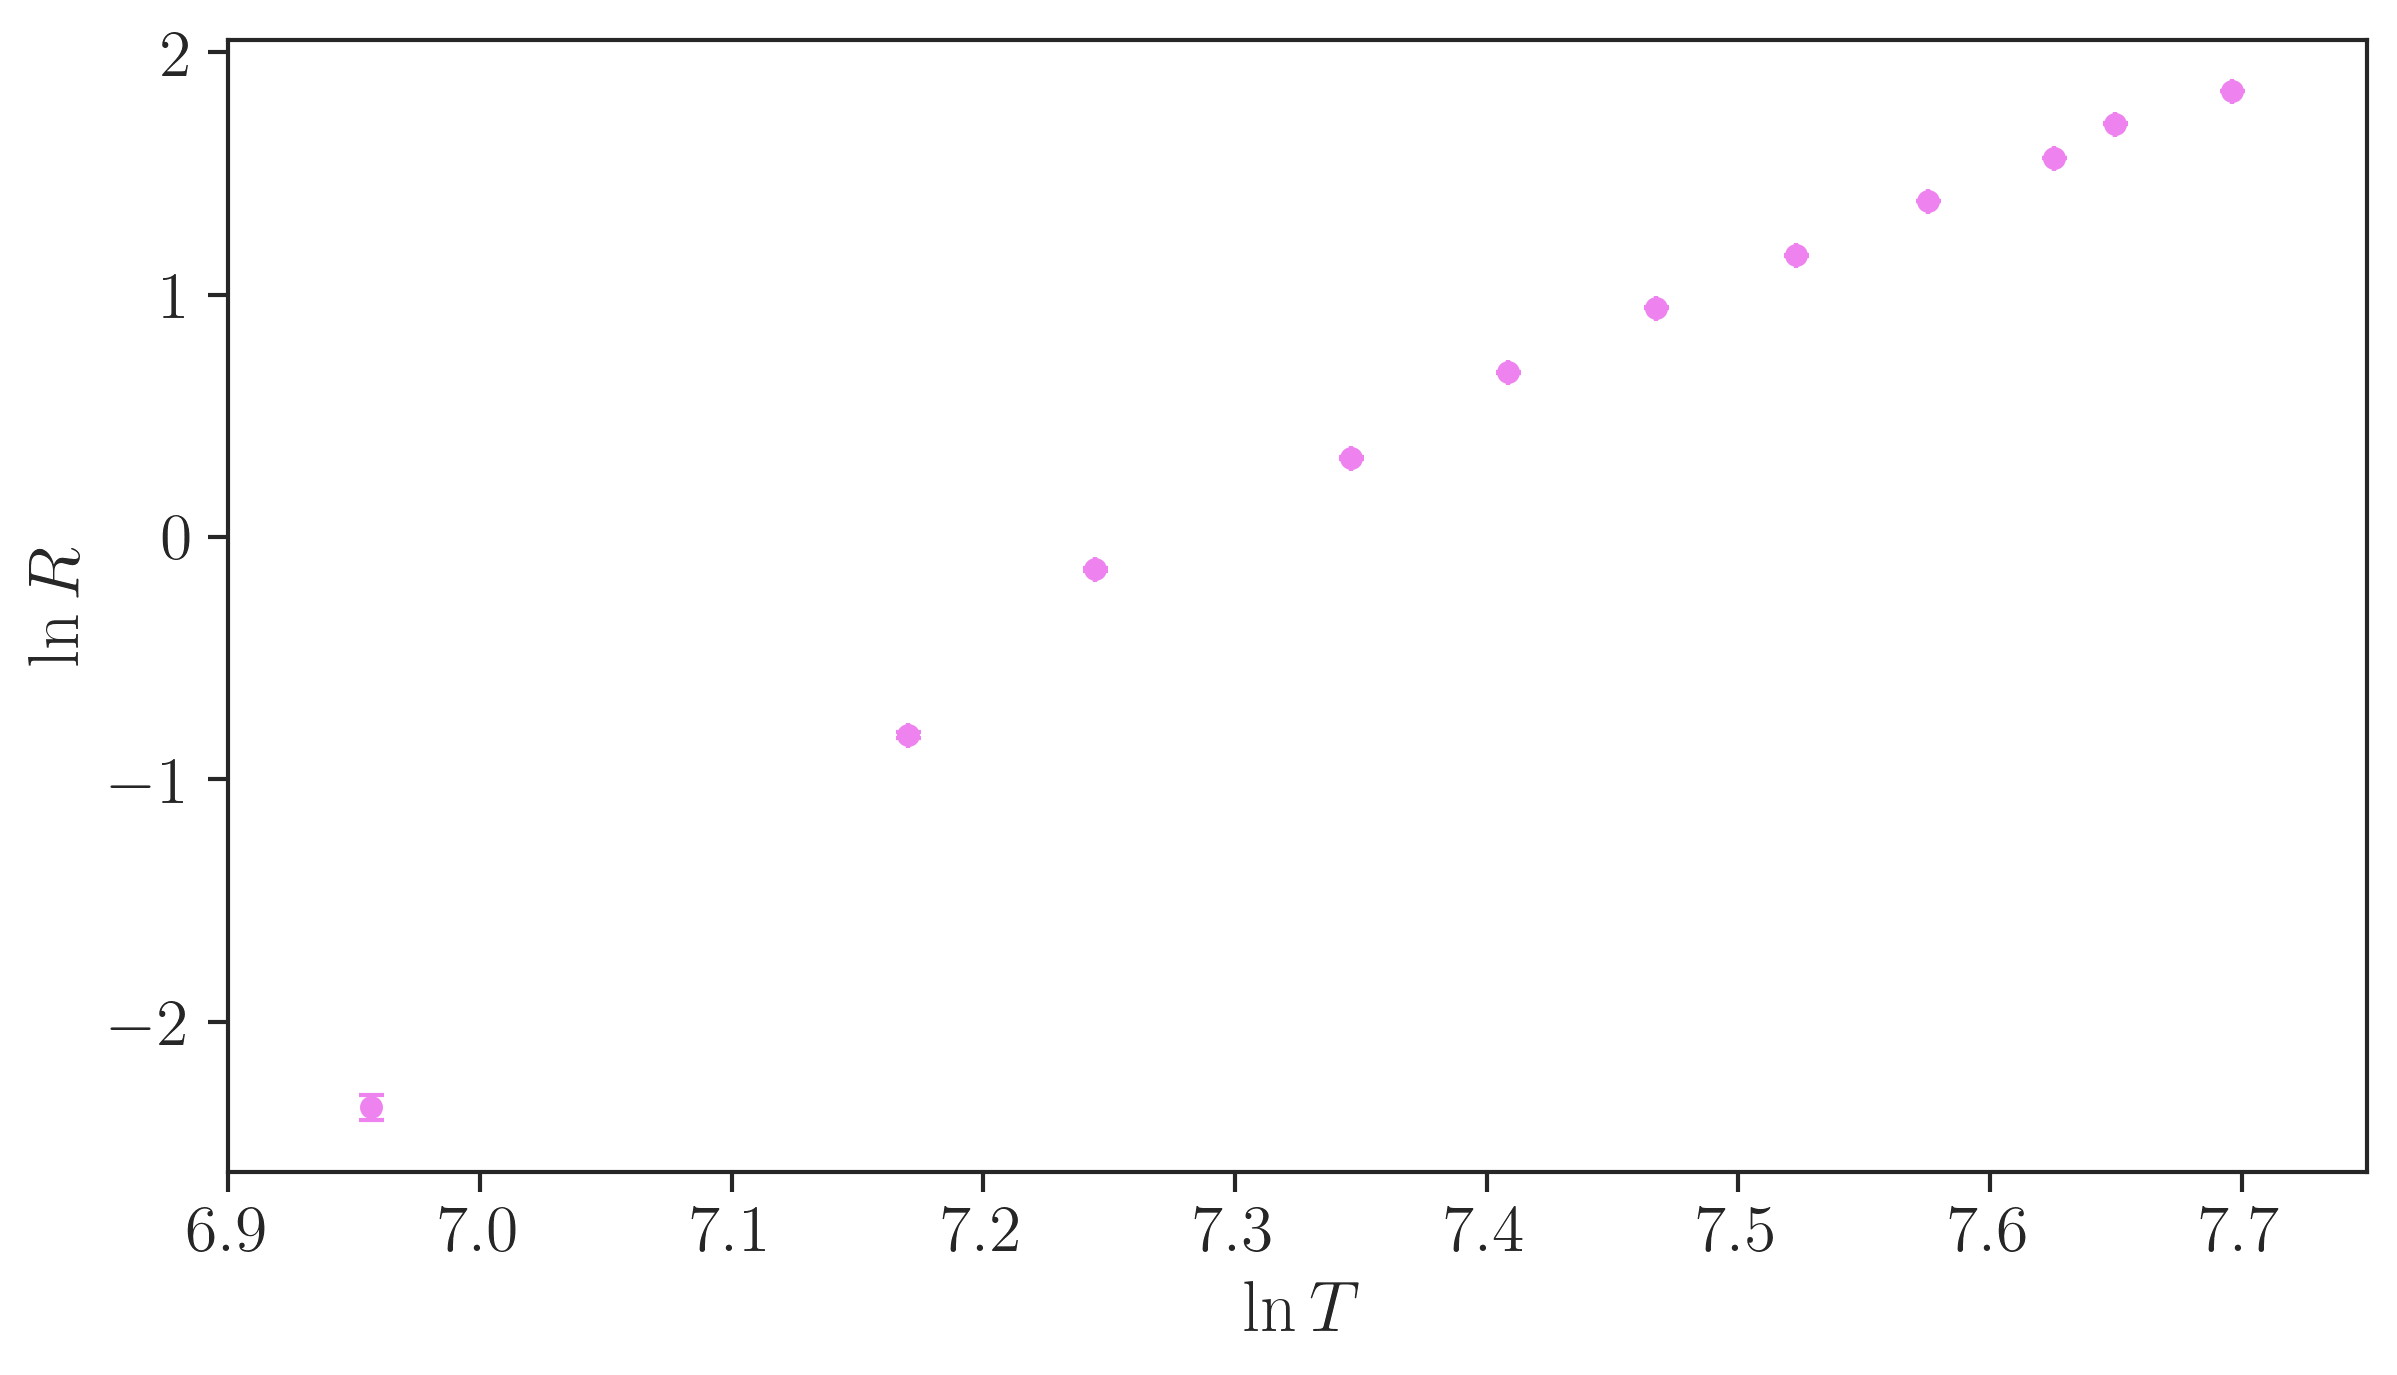

In [145]:
plt.figure(figsize = [9.2,4.9], dpi = 300) 
plt.errorbar(ln_T, ln_R, sigma_ln_R,0,  'o', ms = 4.5, capsize=3, 
                color = 'violet', label = 'Resultados experimentais')

plt.ylabel(r'$\ln{R}$')
plt.xlabel(r'$\ln{T}$')
plt.xlim([6.9,7.75])
plt.show()

### Ajuste linear

In [156]:
fitpars1, cov_pars1 = np.polyfit(ln_T,ln_R,1,w=np.power(sigma_ln_R,-1),cov='True')
#print(fitpars, cov_pars)

coef_angular1 = fitpars1[0]
coef_linear1 = fitpars1[1]
sigma_angular1 = np.sqrt(cov_pars1[0][0])
sigma_linear1 = np.sqrt(cov_pars1[1][1])

sigma_angular1 = float('{:g}'.format(float('{:.1g}'.format(sigma_angular1))))
sigma_linear1 = float('{:g}'.format(float('{:.1g}'.format(sigma_linear1))))

                     
print('Coeficiente angular: %.15f +- %.15f (mV/K^4)' % (coef_angular1 ,sigma_angular1))
print('Coeficiente linear: %.2f +- %.2f (mV)' %(coef_linear1,sigma_linear1))

LinAlgError: SVD did not converge in Linear Least Squares

Nós podemos ver que o método dos mínimos quadrados não converge para encontrar uma reta que se ajuste aos dados. Se olharmos para o gráfico log-log, vemos claramente que os três primeiros pontos tem um comportamento e o resto tem outro. Isso acontece devido ao fato de, em temperaturas mais baixas, o vidro apresentar uma absorção significativa de radiação infravermelha e consequentemente a radiação que chega no sensor é menor do que deveria. Tendo isto em vista, nós vamos realizar o ajuste considerando apenas os dados após os três primeiros pontos.

In [196]:
fitpars2, cov_pars2 = np.polyfit(ln_T[3:],ln_R[3:],1,w=np.power(sigma_ln_R[3:],-1),cov='True')
#print(fitpars, cov_pars)

coef_angular2 = fitpars2[0]
coef_linear2 = fitpars2[1]
sigma_angular2 = np.sqrt(cov_pars2[0][0])
sigma_linear2 = np.sqrt(cov_pars2[1][1])

sigma_angular2 = float('{:g}'.format(float('{:.1g}'.format(sigma_angular2))))
sigma_linear2 = float('{:g}'.format(float('{:.1g}'.format(sigma_linear2))))

                     
print('Coeficiente angular: %.1f +- %.1f ' % (coef_angular2 ,sigma_angular2))
print('Coeficiente linear: %.1f +- %.1f' %(coef_linear2,sigma_linear2))

Coeficiente angular: 4.1 +- 0.1 
Coeficiente linear: -29.8 +- 0.9


In [197]:
#Calulando chi^2_red
yhat = np.polyval(fitpars2, ln_T[4:])
chi_squared = np.sum(((yhat - ln_R[4:])/sigma_ln_R[4:]) ** 2)
chi2_red = chi_squared/(len(ln_R[4:])-2)

#Imprimindo o resultado
print("chi^2_red = %.3f" % chi2_red)

chi^2_red = 594.158


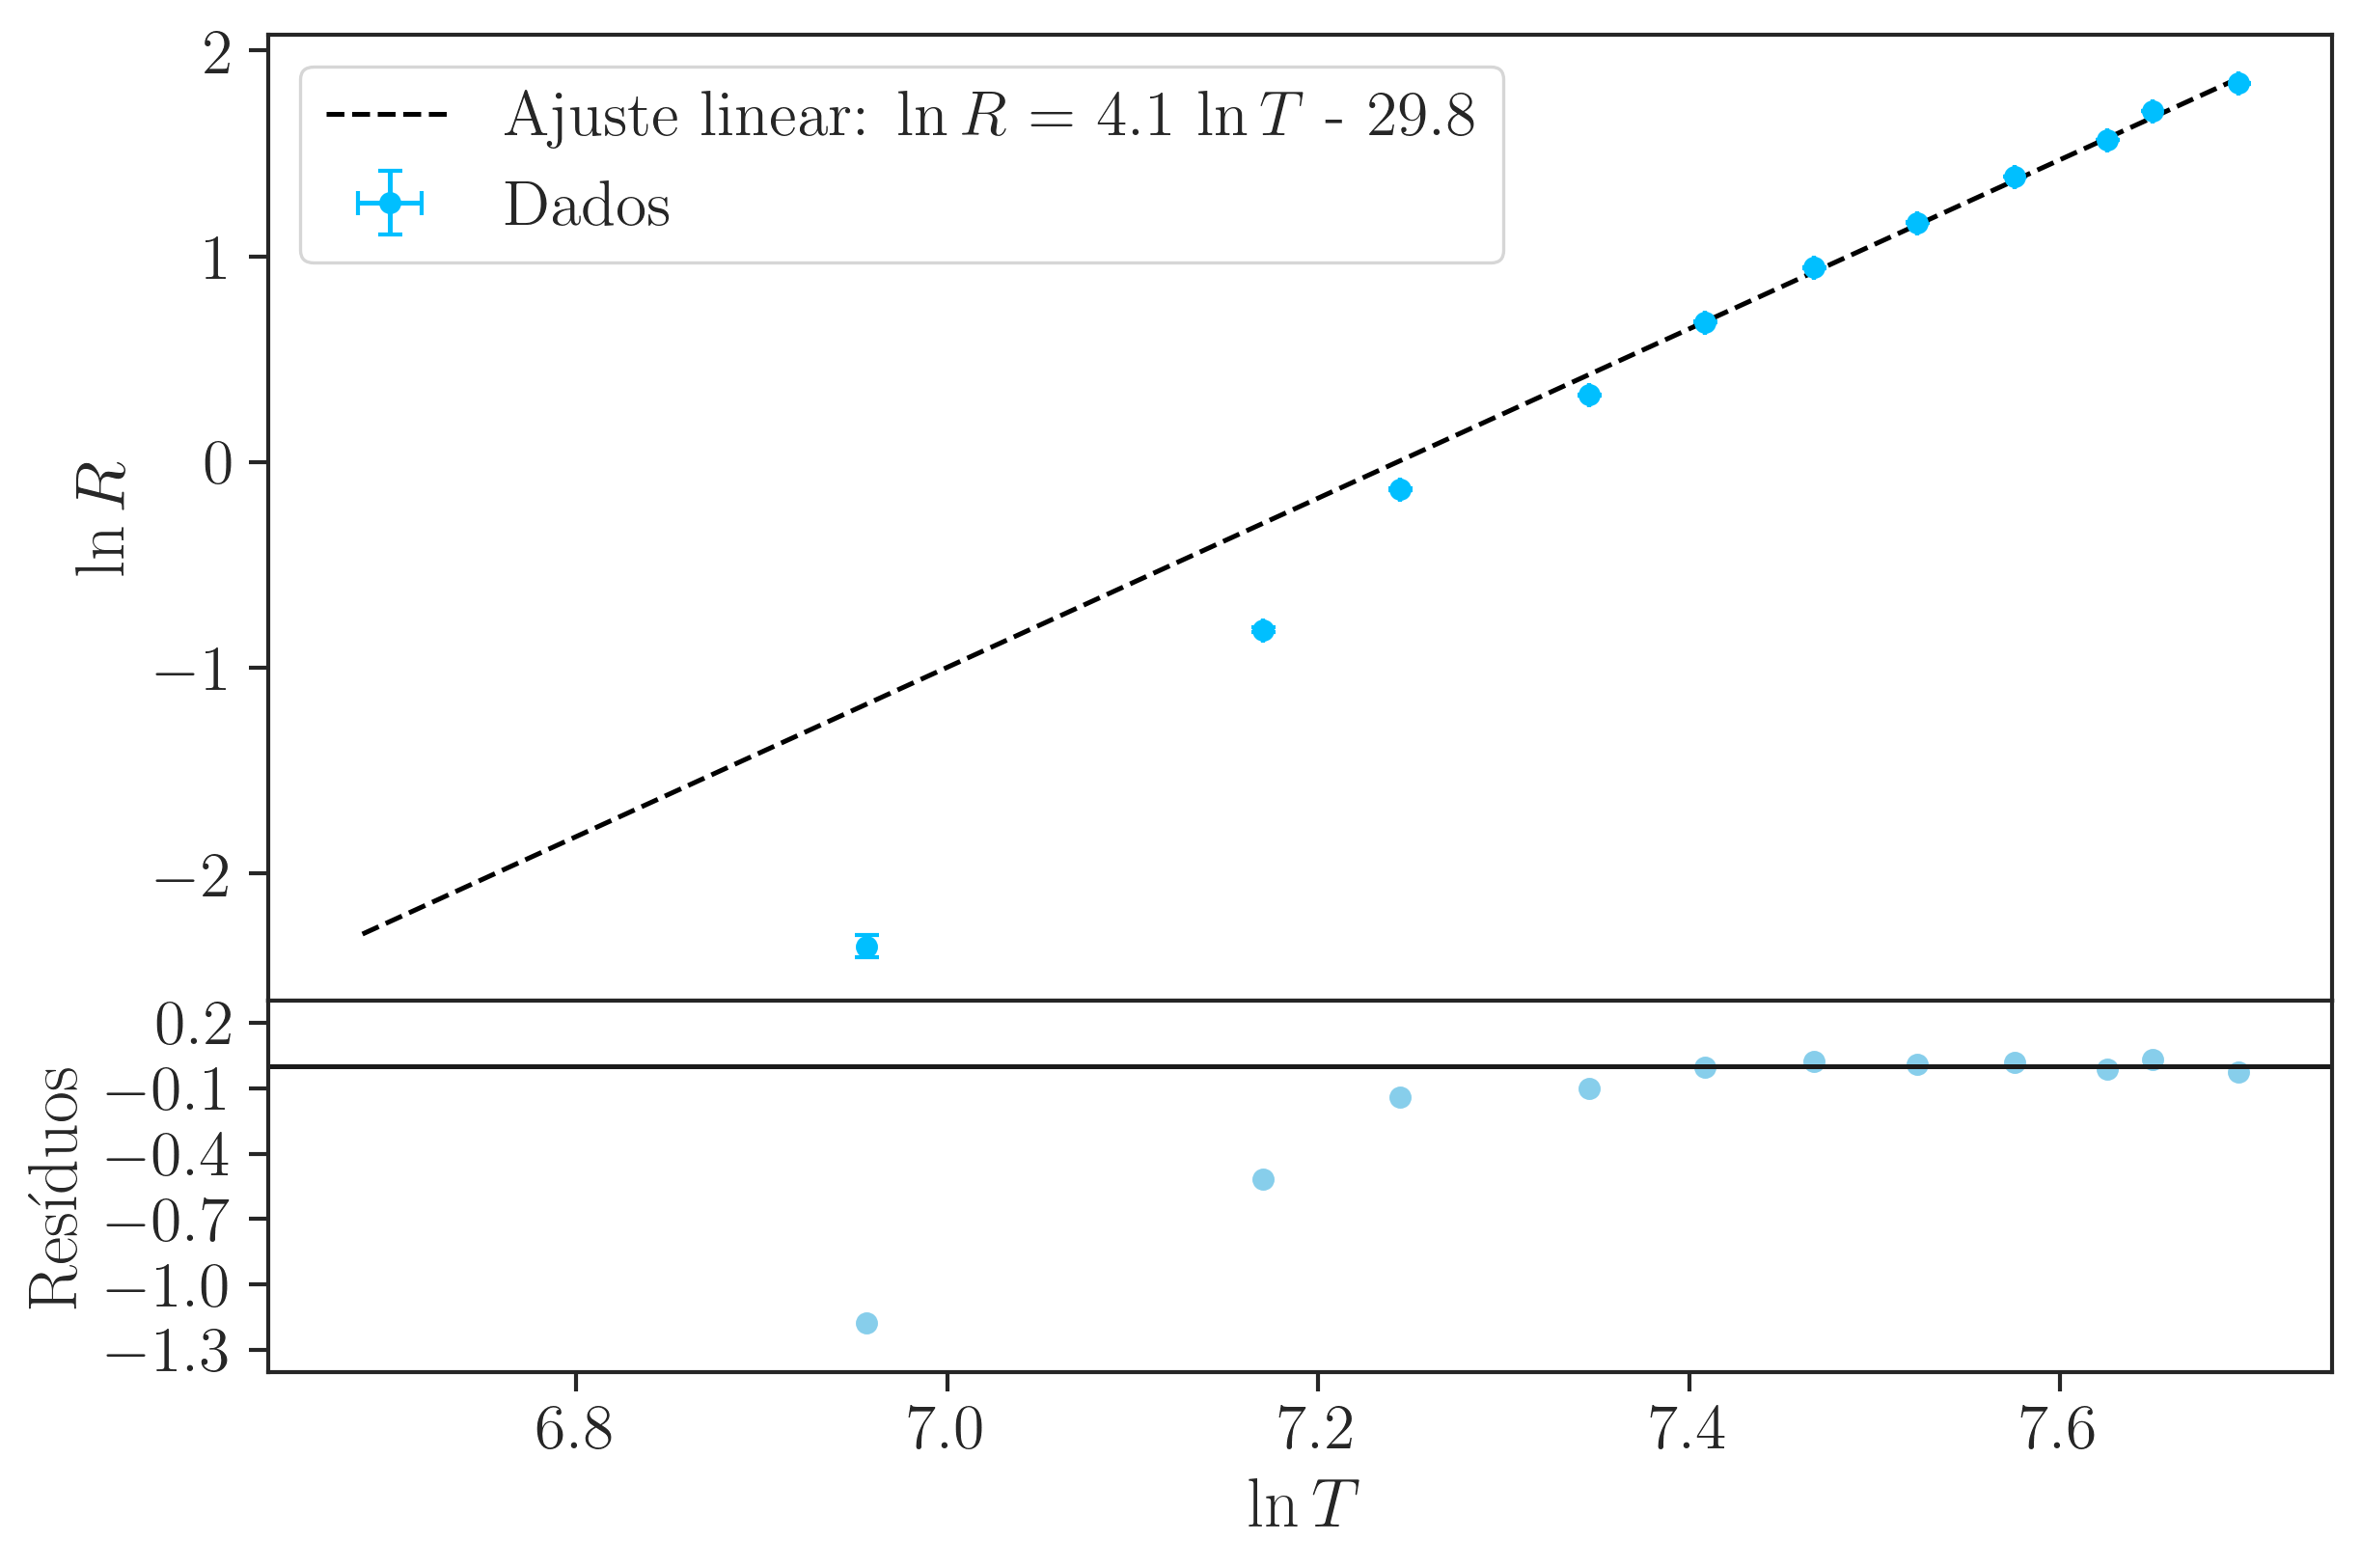

In [208]:
fig = plt.figure(figsize = [9.2,6], dpi = 300) 
gs = fig.add_gridspec(2,1, hspace=0, height_ratios=[6, 2.3])
axs = gs.subplots(sharex=True)


#Gráfico principal
axs[0] = plt.subplot(gs[0])
plt.errorbar(ln_T,ln_R, sigma_ln_R,0,  'o', ms = 4.5, capsize=3, 
         color = 'deepskyblue', label = 'Dados')
axs[0].plot(ln_T,(ln_T * coef_angular2 + coef_linear2), color ='black', ls = '--',
         label = r'Ajuste linear: $\ln{R}$ = %.1f $\ln{T}$ - %.1f' % (coef_angular2,abs(coef_linear2)))
axs[0].set_ylabel(r'$\ln{R}$')
axs[0].legend()
axs[0].set_title('')

#Gráfico de resíduos
axs[1] = plt.subplot(gs[1])
yhat = np.polyval(fitpars2, ln_T)
resid = (ln_R - yhat)
axs[1].plot(ln_T, resid, 'o',ms = 4.5,  color = 'skyblue', label = 'Residuos')
axs[1].axhline(y=0, color='k', linestyle='-')
axs[1].set_ylabel(r"Resíduos ")
axs[1].set_ylim([-1.4, 0.3])
axs[1].set_yticks(np.arange(-1.3,0.3,0.3))

#axs[0].plot(a,(a*0.2768), color ='black', ls = '--',
         #label = r'Ajuste linear: $F_r$ = %.3f $a$ - %.2f' % (coef_angular,abs(coef_linear)))

plt.xlabel(r'$\ln{T}$ ')



#plt.savefig('Graphs/PenduloFisico/Ajuste_amortecido.pdf')
plt.show()

# Segundo experimento: A lei do inverso do quadrado

## Dados da radiação do ambiente e seu valor médio

In [218]:
#Extraindo os dados
ambient_data = pd.read_csv('Dados_Termico/Dados1_Exp2.txt', header = 0, sep = '\t', encoding='latin-1')

#Valor médio de radiação
ambient_rad = np.mean(ambient_data['Radiacao(mV)'])
#Incerteza do valor médio de radiação
sigma_a_rad = np.std(ambient_data['Radiacao(mV)'])/np.sqrt(len(ambient_data['Radiacao(mV)'])-1)

#Imprimindo os resultados
print('Radiação do ambiente: (%.2f +- %.2f) (mV)' % (ambient_rad, sigma_a_rad))
print()
print(ambient_data)

Radiação do ambiente: (0.46 +- 0.04) (mV)

   x(cm)  Radiacao(mV)
0     10          0.61
1     20          0.52
2     30          0.65
3     40          0.39
4     50          0.15
5     60          0.45
6     70          0.43
7     80          0.41
8     90          0.49
9    100          0.49


## Dados da radiação e cálculo da radiação resultante

A radiação da lâmpada consiste na radiação total medida menos a radiação do ambiente, isto é:

$$R_{lamp} = R - R_{amb}$$

Para encontrarmos a incerteza associada a radiação da lâmpada, podemos propagar os erros da radiação total e do ambiente da seguinte maneira:

$$\sigma{R_{lamp}} = \sqrt{\sigma_{R}^2 + \sigma_{R_{amb}}^2}$$

Como $\sigma_R = 0.005 (mV)$ e $\sigma_{R_{amb}} = 0.04 (mV)$:


In [227]:
sigma_R_lamp = np.sqrt(0.005**2 + 0.04**2)
sigma_R_lamp = float('{:g}'.format(float('{:.1g}'.format(sigma_R_lamp))))
print("Incerteza da radiação da lâmpada: %.2f (mV)" %sigma_R_lamp)

Incerteza da radiação da lâmpada: 0.04 (mV)


In [229]:
#Extraindo os dados
data_exp2 = pd.read_csv('Dados_Termico/Dados2_Exp2.txt', header = 0, sep = '\t', encoding='latin-1')

rad_lamp = data_exp2['Radiacao(mV)'] - ambient_rad

print(data_exp2)

    x(cm)  Radiacao(mV)
0     2.5        12.012
1     3.0         8.705
2     3.5         6.214
3     4.0         5.905
4     4.5         5.525
5     5.0         4.615
6     6.0         3.472
7     7.0         2.765
8     8.0         2.228
9     9.0         1.942
10   10.0         1.611
11   12.0         1.167
12   14.0         0.933
13   16.0         0.745
14   18.0         0.612
15   20.0         0.495
16   25.0         0.307
17   30.0         0.193
18   35.0         0.152
19   40.0         0.105
20   45.0         0.085
21   50.0         0.053
22   60.0         0.010
23   70.0        -0.010
24   80.0        -0.020
25   90.0        -0.025
26  100.0        -0.052


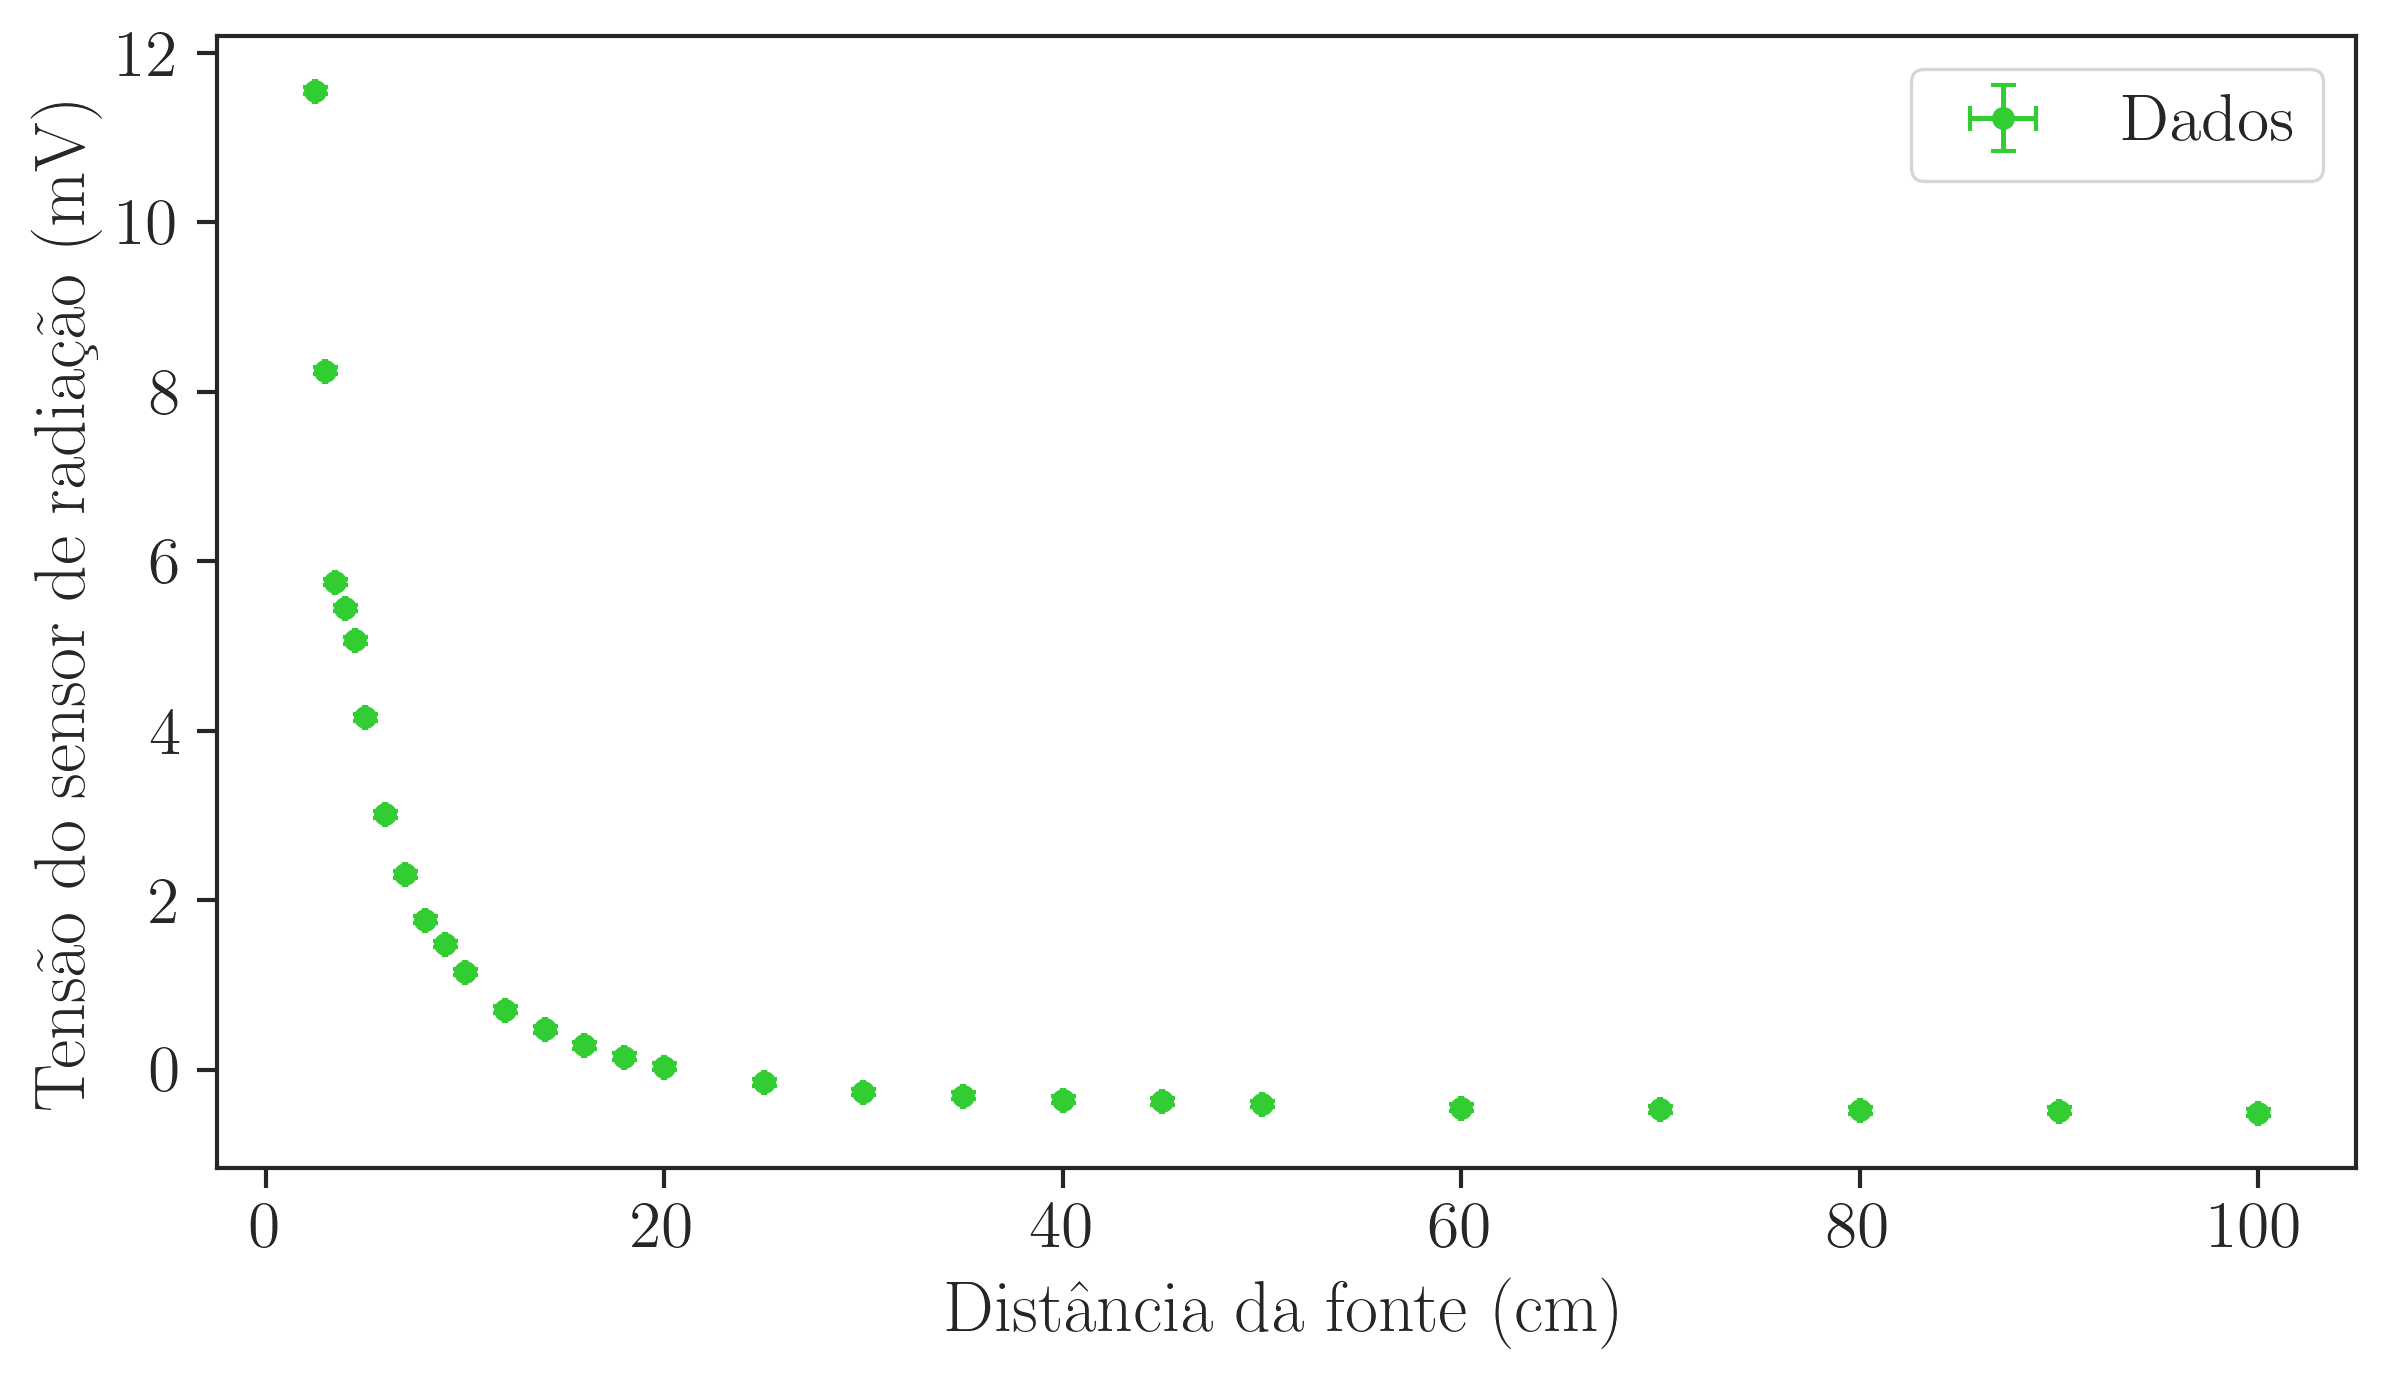

In [233]:
plt.figure(figsize = [9.2,4.9], dpi = 300) 
plt.errorbar(data_exp2['x(cm)'],rad_lamp, sigma_R_lamp,0.05,  'o', ms = 4.5, capsize=3, 
                color = 'limegreen', label = 'Dados')

plt.ylabel(r'Tensão do sensor de radiação (mV)')
plt.xlabel(r'Distância da fonte (cm)')
plt.legend()
plt.show()

## Linearização dos dados

Segundo a teoria, o nível de radiação é proporcional a $1/x^2$, onde $x$ é a distância da fonte até o sensor. Tendo isto em vista, podemos validar a teoria calculando $1/x^2$ em nossos dados e gerando um gráfico do nível de radiação pelo inverso do quadrado da distância. 

A distância é medida através de uma régua e consequentemente tem uma incerteza $\sigma_x = 0.05cm$. Portanto, ao calcularmos $\frac{1}{x^2}$, devemos propagar o erro de $x$ da seguinte maneira:

$$\sigma{\frac{1}{x^2}} = \bigg\vert \frac{d}{dx}\frac{1}{x^2}\bigg\vert\sigma_x = \frac{2\sigma_x}{x^3}$$



In [235]:
z = 1/(data_exp2['x(cm)']**2)
sigma_z = 2*0.05/(data_exp2['x(cm)']**3)
sigma_z = [float('{:g}'.format(float('{:.1g}'.format(sigma)))) for sigma in sigma_z]



### Gráfico dos dados linearizados

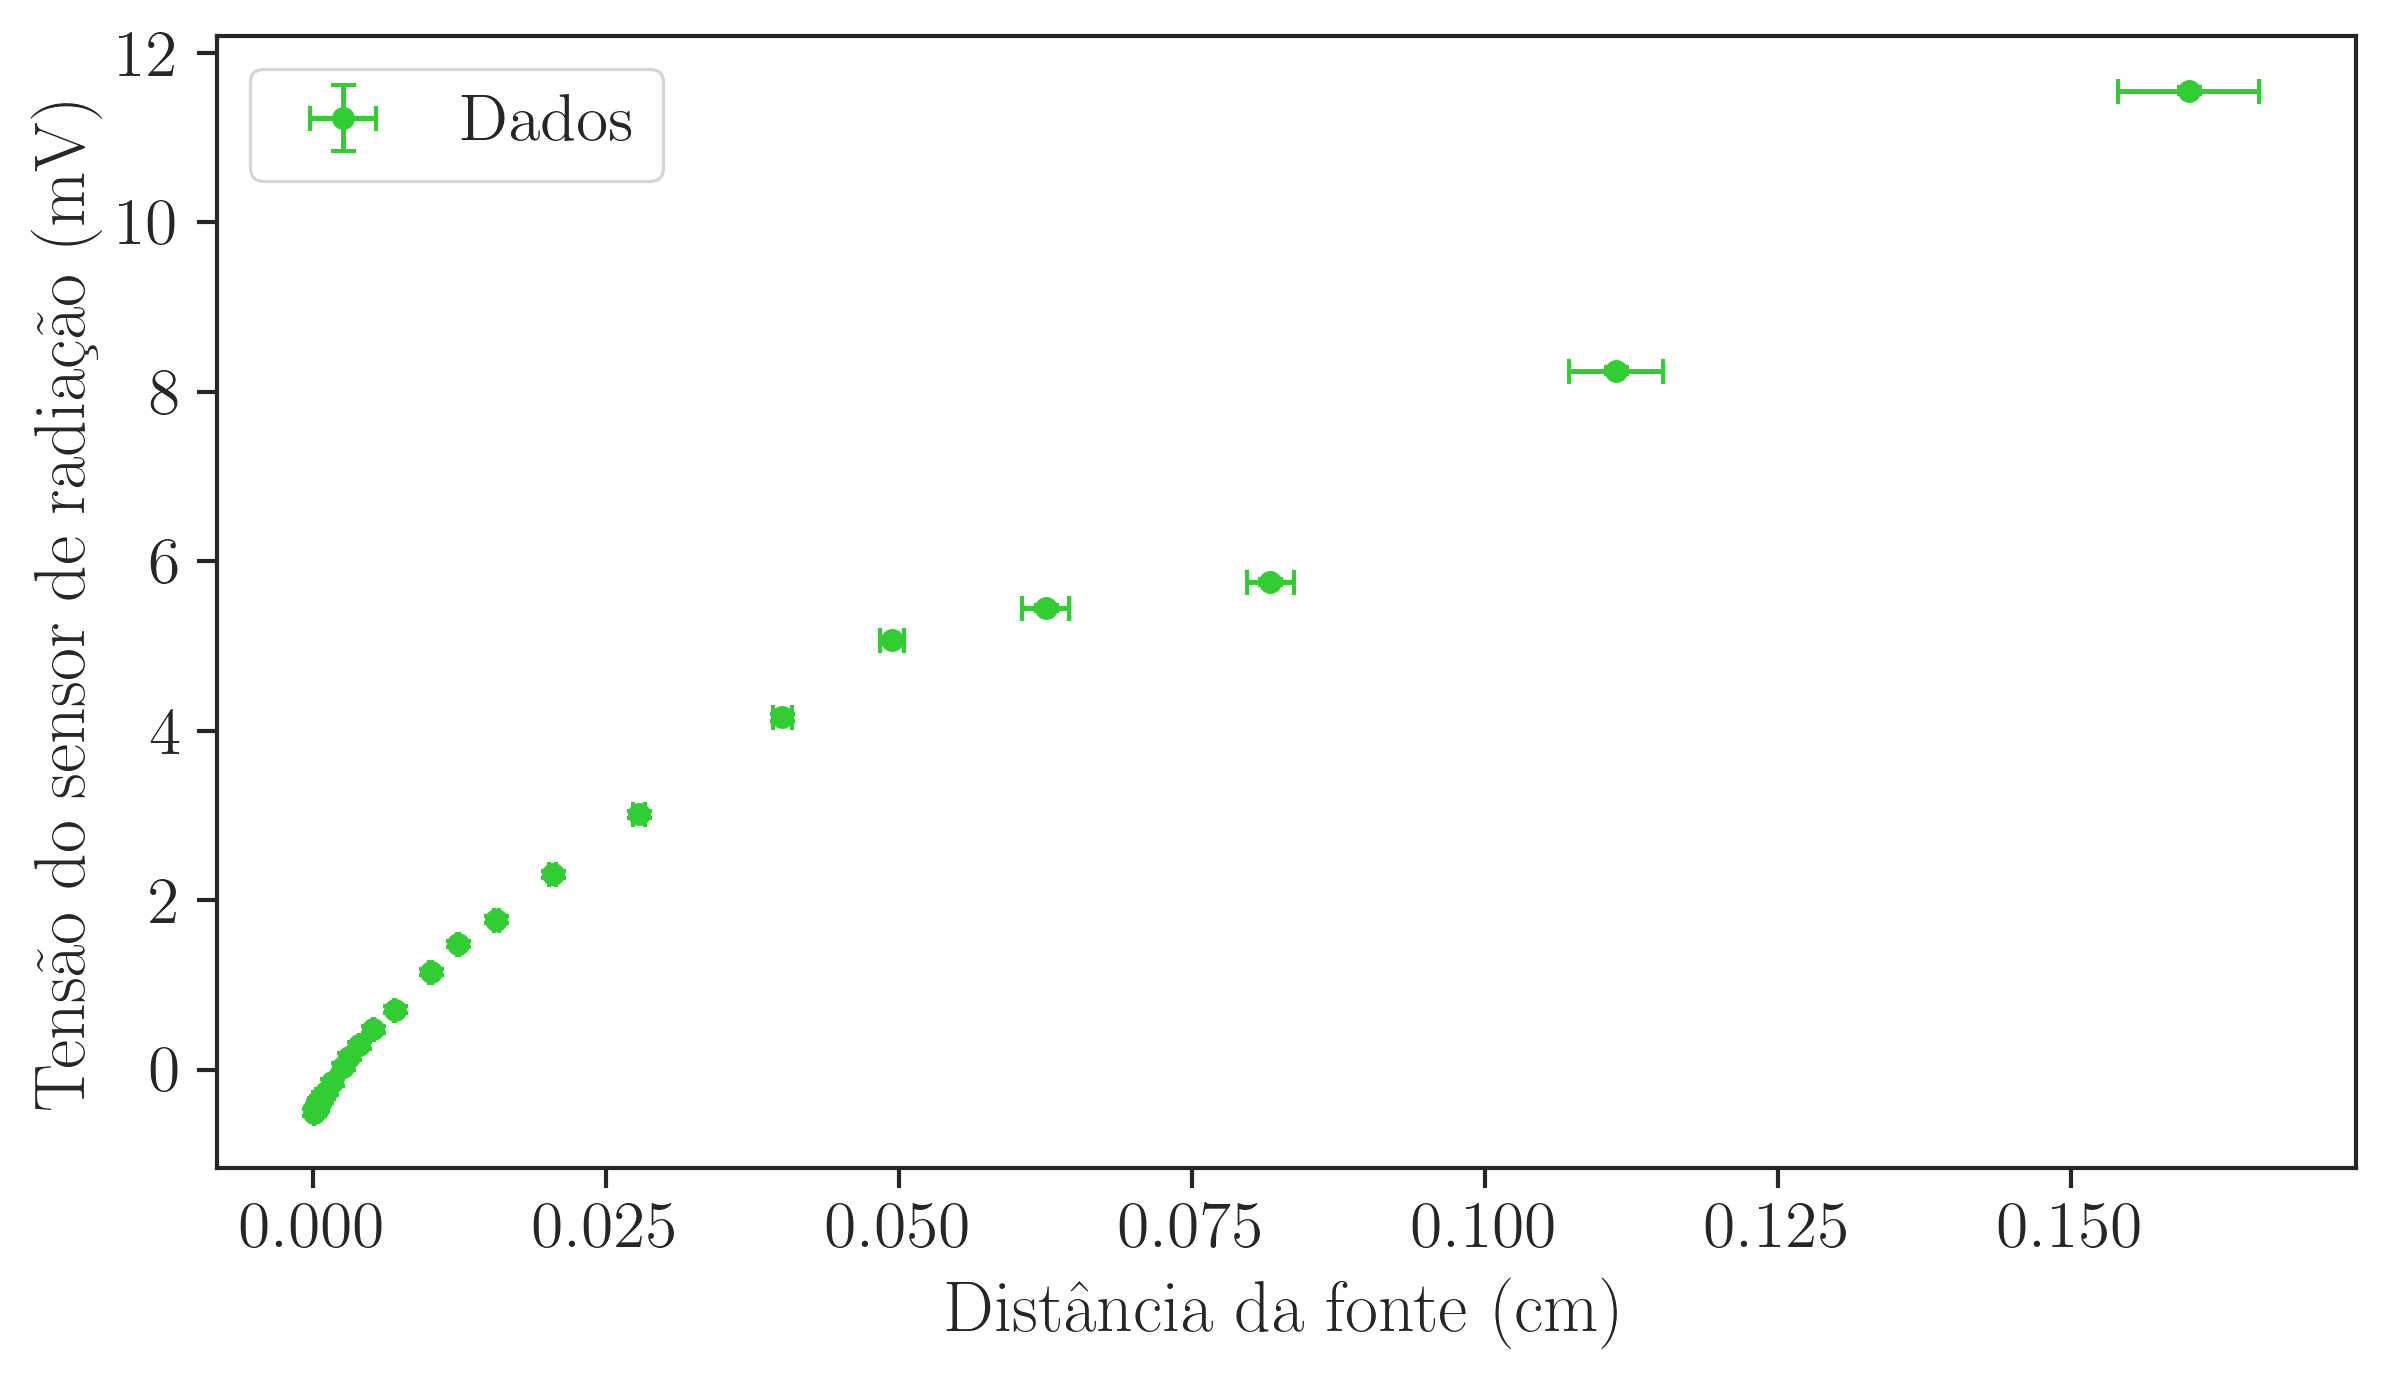

In [236]:
plt.figure(figsize = [9.2,4.9], dpi = 300) 
plt.errorbar(z,rad_lamp, sigma_R_lamp,sigma_z,  'o', ms = 4.5, capsize=3, 
                color = 'limegreen', label = 'Dados')

plt.ylabel(r'Tensão do sensor de radiação (mV)')
plt.xlabel(r'Distância da fonte (cm)')
plt.legend()
plt.show()